In [52]:
#from my_functions import DST_trafo
import locale
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f
from calendar import day_abbr
import locale
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from my_functions import DST_trafo
import seaborn as sns
import statsmodels.api as sm

In [53]:
data = pd.read_csv("/Users/sukem09/Desktop/e_market/FR_utc.csv")

# Inspect data
data  # shows first and last entries


DateTime  FR_Price_DayAhead_PT60M_EUR  \
0      2015-01-04T23:00:00Z                        36.56   
1      2015-01-05T00:00:00Z                        34.94   
2      2015-01-05T01:00:00Z                        32.19   
3      2015-01-05T02:00:00Z                        23.53   
4      2015-01-05T03:00:00Z                        22.92   
...                     ...                          ...   
78307  2014-05-04T22:00:00Z                          NaN   
78308  2014-05-25T22:00:00Z                          NaN   
78309  2014-08-24T22:00:00Z                          NaN   
78310  2013-12-31T23:00:00Z                          NaN   
78311  2014-04-17T22:00:00Z                          NaN   

       FR_Load_DayAhead_PT60M  FR_Load_Actual_PT60M  \
0                       62.90                62.610   
1                       60.25                61.092   
2                       59.65                60.219   
3                       56.50                57.535   
4                       55.05                56.891   
...                       ...                   ...   
78307                     NaN                   NaN   
78308                     NaN                   NaN   
78309                     NaN                   NaN   
78310                     NaN                   NaN   
78311                     NaN                   NaN   

       FR_Generation_Biomass_Actual_Output_PT60M  \
0                                          0.197   
1                                          0.197   
2                                          0.198   
3                                          0.199   
4                                          0.199   
...                                          ...   
78307                                        NaN   
78308                                        NaN   
78309                                        NaN   
78310                                        NaN   
78311                                        NaN   

       FR_Generation_Fossil_Gas_Actual_Output_PT60M  \
0                                             2.435   
1                                             2.451   
2                                             2.456   
3                                             2.481   
4                                             2.654   
...                                             ...   
78307                                           NaN   
78308                                           NaN   
78309                                           NaN   
78310                                           NaN   
78311                                           NaN   

       FR_Generation_Fossil_Hard_coal_Actual_Output_PT60M  \
0                                                  1.484    
1                                                  1.229    
2                                                  1.179    
3                                                  1.121    
4                                                  1.097    
...                                                  ...    
78307                                                NaN    
78308                                                NaN    
78309                                                NaN    
78310                                                NaN    
78311                                                NaN    

       FR_Generation_Fossil_Hard_coal_Actual_Consumption_PT60M  \
0                                                    NaN         
1                                                    NaN         
2                                                    NaN         
3                                                    NaN         
4                                                    NaN         
...                                                  ...         
78307                                                NaN         
78308                                                NaN         
78309                   

In [3]:
# Drop rows where 'Price' is NaN
data = data.dropna(subset=['FR_Price_DayAhead_PT60M_EUR'])

In [4]:
# Setup local time, language
#locale.setlocale(locale.LC_ALL, "en_US.utf8")  # English US Linux
locale.setlocale(locale.LC_ALL, 'EN_US') # English US Mac
# locale.setlocale(locale.LC_ALL,  locale="English_United States.1252") # English US Windows
locale.getlocale()  # check

('en_US', 'ISO8859-1')

In [5]:
data["DateTime"]= pd.to_datetime(data["DateTime"],
                           utc=True, format="%Y-%m-%dT%H:%M:%SZ")

/var/folders/mq/f0db6b294kj_3n5gcz2cyqlh0000gn/T/ipykernel_87995/2387252088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["DateTime"]= pd.to_datetime(data["DateTime"],


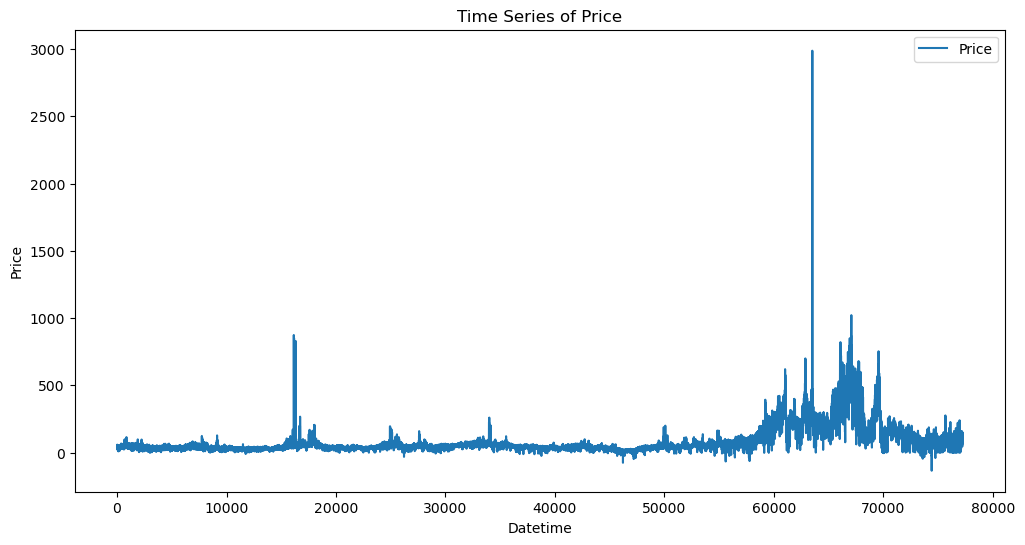

In [6]:

# Plot time series of 'Price' against time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['FR_Price_DayAhead_PT60M_EUR'], label='Price')
plt.title('Time Series of Price')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend()
plt.show()

# Find outlier and remove it

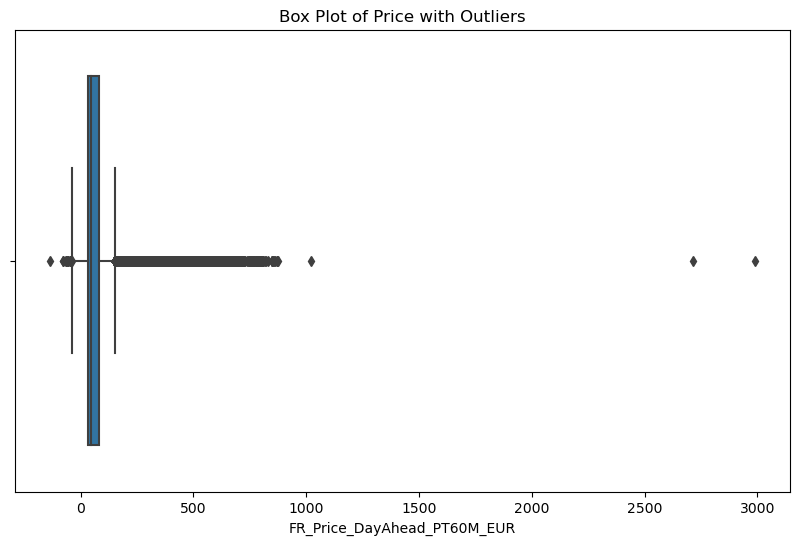

In [7]:
# Function to identify outliers using the IQR method
def identify_outliers(data_column):
    Q1 = np.percentile(data_column, 25)
    Q3 = np.percentile(data_column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data_column < lower_bound) | (data_column > upper_bound)

# Identify outliers in the 'Price' variable
outliers = identify_outliers(data['FR_Price_DayAhead_PT60M_EUR'])

# Visualize outliers using a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['FR_Price_DayAhead_PT60M_EUR'])
plt.title('Box Plot of Price with Outliers')
plt.show()


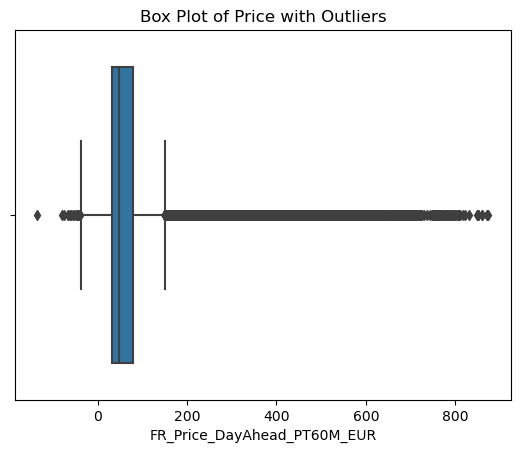

In [8]:
# Drop rows where 'Price' is greater than 1000 - 3 values
data = data[~(data['FR_Price_DayAhead_PT60M_EUR'] > 1000)]

# Check again
outliers = identify_outliers(data['FR_Price_DayAhead_PT60M_EUR'])
sns.boxplot(x=data['FR_Price_DayAhead_PT60M_EUR'])
plt.title('Box Plot of Price with Outliers')
plt.show()

In [9]:
time_utc = pd.to_datetime(data["DateTime"],
                          utc=True, format="%Y-%m-%dT%H:%M:%SZ")
local_time_zone = "CET"
time_lt = time_utc.dt.tz_convert(local_time_zone)

S = 24

In [10]:
# column_names = data.columns.tolist()

# # Specify the file path where you want to save the column names
# file_path = 'column_names.txt'

# # Write the column names to the text file
# with open(file_path, 'w') as file:
#     for column_name in column_names:
#         file.write(column_name + '\n')

# print(f"Column names written to {file_path}")


# Trial

In [11]:
# Drop columns 'wind' and 'solar'
#columns_to_drop = ['wind', 'solar']
#data = data.drop(columns=columns_to_drop, axis=1)
# Filter rows before the year 2023
#data = data[data['DateTime'] < '2023-10-27T21:00:00Z']

In [12]:
# Check on which days the number of products is other than 24
only_days_utc = time_utc.dt.date
only_days_utc_tab = only_days_utc.value_counts().sort_index()
only_days_utc_tab[only_days_utc_tab != 24]

only_days_lt = time_lt.dt.date
only_days_lt_tab = only_days_lt.value_counts().sort_index()
only_days_lt_tab[only_days_lt_tab != 24]

2015-03-29    23
2015-10-25    25
2016-03-27    23
2016-10-30    25
2017-03-26    23
2017-10-29    25
2018-03-25    23
2018-10-28    25
2019-03-31    23
2019-10-27    25
2020-03-29    23
2020-10-25    25
2021-03-28    23
2021-10-31    25
2022-03-27    23
2022-04-04    22
2022-08-30    23
2022-10-30    25
2023-03-26    23
Name: DateTime, dtype: int64

In [13]:
#reduce the data
#N = 3*365*24
#data = data[:-N]

In [14]:
import plotly.graph_objects as go

# Extract price data
price = data.loc[:, "FR_Price_DayAhead_PT60M_EUR"]

# Create Plotly figure
fig = go.Figure()

# Add line trace
fig.add_trace(go.Scatter(x=time_utc, y=data.iloc[:, 1], mode='lines', name='Price'))

# Update layout
fig.update_layout(
    title='Price Over Time',
    xaxis_title='Time',
    yaxis_title='Price in EUR/MWh',
    template='plotly',  # Use a dark theme, you can choose another template if you prefer
    showlegend=True
)

# Show the interactive plot
fig.show()


In [15]:
# # Extract price data
# price = data.loc[:, "FR_Price_DayAhead_PT60M_EUR"]
# # %% simple plot on not clockchange adj. data

# plt.plot(time_utc, data.iloc[:, 1])
# plt.ylabel("Price in EUR/MWh")
# plt.xlabel("Time")
# plt.show()

In [16]:
# %% Save the start and end-time
start_end_time_S = time_lt.iloc[[0, -1]
                                ].dt.tz_localize(None).dt.tz_localize("UTC")

# %% creating 'fake' local time
start_end_time_S_num = pd.to_numeric(start_end_time_S)
time_S_numeric = np.arange(
    start=start_end_time_S_num.iloc[0],
    stop=start_end_time_S_num.iloc[1] + 24 * 60 * 60 * 10 ** 9 / S,
    step=24 * 60 * 60 * 10 ** 9 / S,
)

In [17]:
# %% 'fake' local time
time_S = pd.Series(pd.to_datetime(time_S_numeric, utc=True))
dates_S = pd.Series(time_S.dt.date.unique())
# %% import DST_trafo function and use it on data
data_array = DST_trafo(X=data.iloc[:, 1:], Xtime=time_utc,
                       tz=local_time_zone)
data_array.shape

# %% save as dataframe
price_S = pd.DataFrame(data_array[..., 0], index=dates_S)


In [18]:
price_S # 23 hours of the day

0       1       2      3      4       5       6       7   \
2015-01-05   36.56   34.94   32.19  23.53  22.92   34.26   44.28   50.38   
2015-01-06   45.56   40.28   39.20  36.22  34.04   38.58   43.32   50.00   
2015-01-07   40.00   36.69   37.45  32.08  29.48   34.94   41.74   49.17   
2015-01-08   43.88   35.65   35.87  30.17  24.54   32.00   40.96   49.53   
2015-01-09   32.06   29.71   28.53  23.75  16.05   21.44   31.86   44.00   
...            ...     ...     ...    ...    ...     ...     ...     ...   
2023-10-23  104.31  100.44  101.28  99.27  96.90  100.68  104.31  136.81   
2023-10-24  101.33   97.21   94.54  89.46  90.67   95.06  104.04  122.96   
2023-10-25   99.07   94.56   89.48  85.04  45.59   73.64   91.83  110.48   
2023-10-26   92.53   93.43   92.57  90.00  91.56  100.00  117.08  133.66   
2023-10-27  104.56   95.05   77.96  63.97  45.37   70.13   87.44  122.93   

                8       9   ...      14      15      16      17      18  \
2015-01-05   53.79   52.03  ...   42.00   43.10   46.70   56.78   58.84   
2015-01-06   49.53   50.87  ...   41.45   40.08   43.62   48.55   52.32   
2015-01-07   54.44   50.99  ...   50.88   48.00   47.14   51.07   52.46   
2015-01-08   48.07   48.75  ...   43.47   38.27   41.07   47.97   51.25   
2015-01-09   45.82   45.59  ...   36.29   29.47   30.09   35.43   41.00   
...            ...     ...  ...     ...     ...     ...     ...     ...   
2023-10-23  157.47  150.46  ...  107.00  111.12  114.80  126.87  136.51   
2023-10-24  132.13  136.35  ...  109.45  103.48  118.24  127.93  150.19   
2023-10-25  118.38  140.51  ...  106.79   94.27   89.15   76.95  148.28   
2023-10-26  143.85  149.00  ...  119.60  108.30  101.98  114.71  151.09   
2023-10-27  151.43  152.70  ...   68.67   84.57   63.97  116.04  140.30   

                19      20      21      22      23  
2015-01-05   53.60   46.90   44.58   48.70   46.06  
2015-01-06   53.10   48.78   43.91   44.58   45.73  
2015-01-07   48.78   47.45   42.02   45.57   45.60  
2015-01-08   50.31   47.97   40.50   43.80   44.05  
2015-01-09   38.95   32.53   26.69   26.56   25.26  
...            ...     ...     ...     ...     ...  
2023-10-23  157.91  129.95  105.35  108.96   92.76  
2023-10-24  154.12  133.45  119.31  114.10  102.78  
2023-10-25  158.20  137.25  123.77  120.06  112.80  
2023-10-26  151.41  131.29  119.06  117.06  104.85  
2023-10-27  140.92  121.68  100.38   96.95   93.70  

[3218 rows x 24 columns]

# Naieve Expert model 

In [19]:
# now suppose we get the first 2*365 days (2 years) of EPEX.DE+AT data and
# shall do a forecast for the next day (2*365+1) :
D = 730
index = np.arange(D)

# the available data is:
price_S.iloc[index]


0      1      2      3      4      5      6      7      8   \
2015-01-05  36.56  34.94  32.19  23.53  22.92  34.26  44.28  50.38  53.79   
2015-01-06  45.56  40.28  39.20  36.22  34.04  38.58  43.32  50.00  49.53   
2015-01-07  40.00  36.69  37.45  32.08  29.48  34.94  41.74  49.17  54.44   
2015-01-08  43.88  35.65  35.87  30.17  24.54  32.00  40.96  49.53  48.07   
2015-01-09  32.06  29.71  28.53  23.75  16.05  21.44  31.86  44.00  45.82   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2016-12-30  50.91  50.23  49.73  47.10  46.25  48.06  51.35  60.00  67.70   
2016-12-31  57.91  52.60  48.85  46.61  45.48  45.45  48.17  50.20  52.44   
2017-01-01  58.82  58.23  51.95  47.27  45.49  44.50  44.50  44.72  44.22   
2017-01-02  54.99  50.18  49.11  45.78  44.99  46.97  52.00  59.07  64.98   
2017-01-03  54.68  52.74  49.25  45.00  45.18  49.25  57.65  70.51  74.04   

               9   ...     14     15     16     17      18     19     20  \
2015-01-05  52.03  ...  42.00  43.10  46.70  56.78   58.84  53.60  46.90   
2015-01-06  50.87  ...  41.45  40.08  43.62  48.55   52.32  53.10  48.78   
2015-01-07  50.99  ...  50.88  48.00  47.14  51.07   52.46  48.78  47.45   
2015-01-08  48.75  ...  43.47  38.27  41.07  47.97   51.25  50.31  47.97   
2015-01-09  45.59  ...  36.29  29.47  30.09  35.43   41.00  38.95  32.53   
...           ...  ...    ...    ...    ...    ...     ...    ...    ...   
2016-12-30  67.25  ...  51.47  53.00  57.23  67.40   72.43  72.04  70.60   
2016-12-31  54.76  ...  49.21  49.94  53.30  62.47   70.69  69.72  57.10   
2017-01-01  42.06  ...  46.91  46.51  46.52  51.59   59.07  62.10  56.26   
2017-01-02  65.02  ...  61.19  59.71  60.96  73.55   77.42  75.00  70.11   
2017-01-03  75.32  ...  70.51  69.94  71.11  81.32  137.21  90.17  74.94   

               21     22     23  
2015-01-05  44.58  48.70  46.06  
2015-01-06  43.91  44.58  45.73  
2015-01-07  42.02  45.57  45.60  
2015-01-08  40.50  43.80  44.05  
2015-01-09  26.69  26.56  25.26  
...           ...    ...    ...  
2016-12-30  69.59  69.09  66.70  
2016-12-31  54.49  54.95  61.19  
2017-01-01  55.00  56.02  52.00  
2017-01-02  61.21  60.10  58.78  
2017-01-03  71.59  68.73  67.42  

[730 rows x 24 columns]

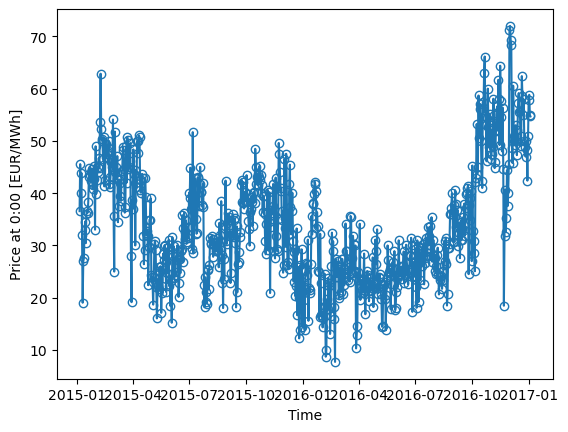

In [20]:
# %% plot the available data
plt.plot(price_S.iloc[index, 0], marker='o', markerfacecolor='none')
plt.ylabel("Price at 0:00 [EUR/MWh]")
plt.xlabel("Time")
plt.show()

In [21]:
# Now we want to write functions that take as input available/provided data and
# give as output the forecast of the next days value. Within the function we
# will use the object Y as representative for provided data with the structure
# of price_S, so we set
Y = price_S.iloc[index]

# then e.g.
Y.iloc[-1] # gives the value of the last day. This we will use to define the function

0      54.68
1      52.74
2      49.25
3      45.00
4      45.18
5      49.25
6      57.65
7      70.51
8      74.04
9      75.32
10     74.65
11     73.31
12     72.71
13     71.69
14     70.51
15     69.94
16     71.11
17     81.32
18    137.21
19     90.17
20     74.94
21     71.59
22     68.73
23     67.42
Name: 2017-01-03, dtype: float64

In [22]:
def forecast_naive_s(Y):
    return Y.values[-1]  # return the last row


forecast_naive_s(Y)

# %%
Y.tail()

# %%


def forecast_naive_7s(Y):
    return Y.values[-7]


forecast_naive_7s(Y)

# %% compare
Y.tail(8)
# %% with
pd.DataFrame((forecast_naive_s(Y), forecast_naive_7s(Y)),
             index=["naive_s", "naive_7s"])

# %% ##### Naive model #####
days = pd.to_datetime(dates_S[index], utc=True)
days.dt.strftime("%a")  # we extract the day of the week abbreviation

# %% add one day to the last value and get the day of the week
(days.iloc[-1] + pd.DateOffset(1)).strftime("%a")

'Wed'

In [23]:
# %% naive model


def forecast_naive(Y, days):
    weekday = (days.iloc[-1] + pd.DateOffset(1)
               ).weekday() + 1  # 1 - Mon, ... , 7 - Sun
    if weekday in [1, 6, 7]:  # if Mon, Sat, Sun, use the price from previous week
        forecast = Y.values[-7]
    else:  # otherwise, use the price of yesterday
        forecast = Y.values[-1]
    return {"forecasts": forecast, "coefficients": None}


forecast_naive(price_S.iloc[index], days=dates_S[index])
# %% ###### Expert Models ######

# For illustration purpose a choice of a period of a day
s = 5  # id for period / hour of the day
# extended days vector: including the day to forecast
days_ext = pd.concat((days, pd.Series(days.iloc[-1] + pd.DateOffset(1),
                                      index=[index[-1]+1])))
days_ext

# %% for week-day dummies:
weekdays_num = days_ext.dt.weekday + 1
weekdays_num

# %% weekday dummy matrix
expert_wd = [1, 6, 7]  # 1=Mon, 6=Sat, 7=Sun
WD = pd.DataFrame([(weekdays_num == x) + 0 for x in expert_wd]).transpose()
WD.columns = [day_abbr[i-1] for i in expert_wd]
WD
# %% expert model specification
XREG = pd.concat([pd.Series(np.ones(WD.shape[0]), name="intercept"),
                 WD], axis=1)  # regression matrix
XREG

# %% response vector
YREG = Y.iloc[index, s]
YREG

# %% first linear model
mod1 = sm.OLS(YREG.values, XREG.iloc[:-1]).fit()
mod1.summary()

# %% estimated parameters
mod1.params

# %% double check with analytic formula:
mod1a = np.linalg.inv(XREG.iloc[:-1].transpose() @ XREG.iloc[:-1]
                      ) @ XREG.iloc[:-1].transpose() @ YREG.values
mod1a


0    29.649712
1    -3.590760
2    -3.591251
3   -10.236635
dtype: float64

In [24]:
# %% forecast
mod1.params @ XREG.iloc[-1]

# %% the same model using sklearn

mod1b = LinearRegression(fit_intercept=False).fit(X=XREG.iloc[:-1], y=YREG)

mod1b.coef_  # estimated parameters

# %% forecast
mod1b.coef_ @ XREG.iloc[-1]

# %% Compare the estimates:
print(mod1.params)
print(mod1a)
print(mod1b.coef_)


intercept    29.649712
Mon          -3.590760
Sat          -3.591251
Sun         -10.236635
dtype: float64
0    29.649712
1    -3.590760
2    -3.591251
3   -10.236635
dtype: float64
[ 29.64971223  -3.59075985  -3.59125069 -10.23663531]


In [25]:
# %% expert lag specification
expert_lags = [1, 2, 7]

# function for getting 'lagged' vectors


def get_lagged(lag, Z):
    return np.concatenate((np.repeat(np.nan, lag), Z[:(len(Z) + 1-lag)]))


# example:
get_lagged(lag=3, Z=np.array([1, 2, 5, 6, 2, -3, 0, 9]))

# %%
YREG.head(10)
# %%
get_lagged(lag=3, Z=YREG)[:10]

# %% lagged vectors using list comprehension
XLAG = pd.DataFrame(np.transpose([get_lagged(lag=lag, Z=YREG)
                                  for lag in expert_lags]),
                    columns=["lag "+str(lag) for lag in expert_lags])
XLAG

# %% defining regression matrix
XREG = pd.concat([pd.Series(np.ones(WD.shape[0]), name="intercept"),
                  XLAG, WD], axis=1)
XREG

intercept  lag 1  lag 2  lag 7  Mon  Sat  Sun
0          1.0    NaN    NaN    NaN    1    0    0
1          1.0  34.26    NaN    NaN    0    0    0
2          1.0  38.58  34.26    NaN    0    0    0
3          1.0  34.94  38.58    NaN    0    0    0
4          1.0  32.00  34.94    NaN    0    0    0
..         ...    ...    ...    ...  ...  ...  ...
726        1.0  48.06  37.64  38.55    0    1    0
727        1.0  45.45  48.06  16.12    0    0    1
728        1.0  44.50  45.45  22.66    1    0    0
729        1.0  46.97  44.50  45.76    0    0    0
730        1.0  49.25  46.97  40.83    0    0    0

[731 rows x 7 columns]

In [26]:
XREG = XREG.dropna()
#YREG = YREG.dropna()

In [27]:
# %% and response vector
YREG = price_S.iloc[index, s]
YREG



2015-01-05    34.26
2015-01-06    38.58
2015-01-07    34.94
2015-01-08    32.00
2015-01-09    21.44
              ...  
2016-12-30    48.06
2016-12-31    45.45
2017-01-01    44.50
2017-01-02    46.97
2017-01-03    49.25
Name: 5, Length: 730, dtype: float64

In [28]:
print("Dimensions of YREG:", YREG.shape)
print("Dimensions of XREG:", XREG.shape)


Dimensions of YREG: (730,)
Dimensions of XREG: (724, 7)


In [29]:
# Assuming you want to drop the first 7 values from YREG
YREG = YREG.iloc[7:]



In [30]:

mod2 = sm.OLS(YREG.notna().values, XREG.iloc[:-1].notna()).fit()

# Print model summary
print(mod2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 29 Dec 2023   Prob (F-statistic):                nan
Time:                        17:24:26   Log-Likelihood:                 23179.
No. Observations:                 723   AIC:                        -4.636e+04
Df Residuals:                     722   BIC:                        -4.635e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1429   1.53e-17   9.31e+15      0.0

/Users/sukem09/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning:

divide by zero encountered in double_scalars

/Users/sukem09/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1736: RuntimeWarning:

divide by zero encountered in double_scalars



In [31]:

# %% and using the other method
mod2b = LinearRegression(fit_intercept=False).fit(X=XREG.iloc[:-1].notna(), y=YREG.notna())

# in both cases leads to an error due to missings..

# %% index set without missings
act_index = np.array(~ np.isnan(XREG).any(axis=1))
act_index[-1] = False  # no NAs and no last obs

# %% Estimating the models again
mod2 = sm.OLS(YREG[act_index[:-1]].values, XREG.iloc[act_index]).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     412.8
Date:                Fri, 29 Dec 2023   Prob (F-statistic):          1.40e-228
Time:                        17:24:26   Log-Likelihood:                -2159.1
No. Observations:                 723   AIC:                             4332.
Df Residuals:                     716   BIC:                             4364.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.8893      0.652      5.967      0.000       2.610       5.169
lag 1          0.7055      0.036     19.365      0.000       0.634       0.777
lag 2          0.0777      0.035      2.213      0.027       0.009       0.147
lag 7          0.1218      0.026      4.613      0.000       0.070       0.174
Mon            3.2205      0.621      5.185      0.000       2.001       4.440
Sat           -4.3876      0.556     -7.889      0.000      -5.480      -3.296
Sun           -7.6232      0.643    -11.860      0.000      -8.885      -6.361
==============================================================================
Omnibus:                       47.076   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.866
Skew:                           0.219   Prob(JB):                     3.88e-34
Kurtosis:                       5.217   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
mod2b = LinearRegression(fit_intercept=False).fit(
    X=XREG.iloc[act_index], y=YREG[act_index[:-1]])

# again, we get the forecast by
print(mod2.params @ XREG.iloc[-1])
print(mod2b.coef_ @ XREG.iloc[-1])

# %% We define manually and run the function line by line for understanding
Y = price_S.iloc[index]
days = pd.to_datetime(dates_S[index], utc=True)
expert_wd = [1, 6, 7]
expert_lags = [1, 2, 7]

47.258178828054724
47.25817882805474


In [33]:


# %% forecast function


def forecast_expert(Y, days, expert_wd=[1, 6, 7], expert_lags=[1, 2, 7]):
    S = Y.shape[1]
    forecast = np.repeat(np.nan, S)

    days_ext = pd.concat((days, pd.Series(days.iloc[-1] + pd.DateOffset(1),
                                          index=[len(days)])))
    # preparation of weekday dummies including the day to forecast
    weekdays_num = days_ext.dt.weekday+1  # 1 = Mon, 2 = Tue, ..., 7 = Sun
    WD = np.transpose([(weekdays_num == x) + 0 for x in expert_wd])

    # preparation of lags :
    def get_lagged(lag, Z):
        return np.concatenate((np.repeat(np.nan, lag), Z[:(len(Z) + 1-lag)]))

    coefs = np.empty((S, len(expert_wd)+len(expert_lags)+1))

    for s in range(S):
        # prepare the Y vector
        YREG = Y.iloc[:, s].values

        # get lags
        XLAG = np.transpose([get_lagged(lag=lag, Z=YREG)
                            for lag in expert_lags])

        # combine to X matrix
        XREG = np.column_stack((np.ones(Y.shape[0]+1), WD, XLAG))

        act_index = ~ np.isnan(XREG).any(axis=1)
        act_index[-1] = False  # no NAs and no last obs
        model = LinearRegression(fit_intercept=False).fit(
            X=XREG[act_index], y=YREG[act_index[:-1]])

        forecast[s] = model.coef_ @ XREG[-1]
        coefs[s] = model.coef_

    regressor_names = ["intercept"]+[
        day_abbr[i-1]
        for i in expert_wd]+["lag "+str(lag)
                             for lag in expert_lags]

    coefs_df = pd.DataFrame(coefs, columns=regressor_names)

    return {"forecasts": forecast, "coefficients": coefs_df}


forecast_expert(Y=price_S.iloc[index],
                days=pd.to_datetime(dates_S[index], utc=True))



{'forecasts': array([53.53205542, 51.05187334, 48.34824832, 44.27746723, 43.83244089,
        47.25817883, 53.77317701, 64.14963516, 67.58151805, 69.46193027,
        69.11187937, 67.9412833 , 67.44925405, 65.57422301, 63.19092019,
        62.8707924 , 64.99449922, 74.91090572, 93.49302723, 76.38968331,
        70.1271083 , 64.35083949, 63.00429939, 62.01703535]),
 'coefficients':     intercept        Mon        Sat        Sun     lag 1     lag 2     lag 7
 0    4.024496  -2.845372  -0.384453  -5.224378  0.547452  0.247396  0.123548
 1    3.746340  -2.978397  -1.342160  -5.189713  0.591376  0.210069  0.121834
 2    3.903842  -2.738056  -1.496401  -5.872732  0.605579  0.214366  0.095099
 3    4.015413  -2.532214  -1.467021  -6.182346  0.620722  0.182489  0.098251
 4    4.179112  -1.043705  -2.441638  -6.698796  0.649264  0.139633  0.102631
 5    3.889295   3.220482  -4.387640  -7.623207  0.705517  0.077661  0.121833
 6    4.194265  10.088723  -8.307518  -8.982372  0.657258  0.069588  0.

In [34]:
# %% Now we illustrate naive vs. expert vs. actual
f_expert = forecast_expert(
    price_S.iloc[index], days=pd.to_datetime(dates_S[index], utc=True))
f_naive = forecast_naive(
    price_S.iloc[index], days=pd.to_datetime(dates_S[index], utc=True))
df = pd.DataFrame([price_S.iloc[index[-1] + 1], f_naive["forecasts"],
                   f_expert["forecasts"]],
                  index=["actual", "naive", "expert"]).transpose()
df

actual   naive     expert
0    62.69   54.68  53.532055
1    56.04   52.74  51.051873
2    54.10   49.25  48.348248
3    52.00   45.00  44.277467
4    51.36   45.18  43.832441
5    53.02   49.25  47.258179
6    62.40   57.65  53.773177
7    72.32   70.51  64.149635
8    73.01   74.04  67.581518
9    73.00   75.32  69.461930
10   72.85   74.65  69.111879
11   72.51   73.31  67.941283
12   71.72   72.71  67.449254
13   71.59   71.69  65.574223
14   69.00   70.51  63.190920
15   67.13   69.94  62.870792
16   68.26   71.11  64.994499
17   72.15   81.32  74.910906
18   76.80  137.21  93.493027
19   76.16   90.17  76.389683
20   72.48   74.94  70.127108
21   66.16   71.59  64.350839
22   64.98   68.73  63.004299
23   61.95   67.42  62.017035

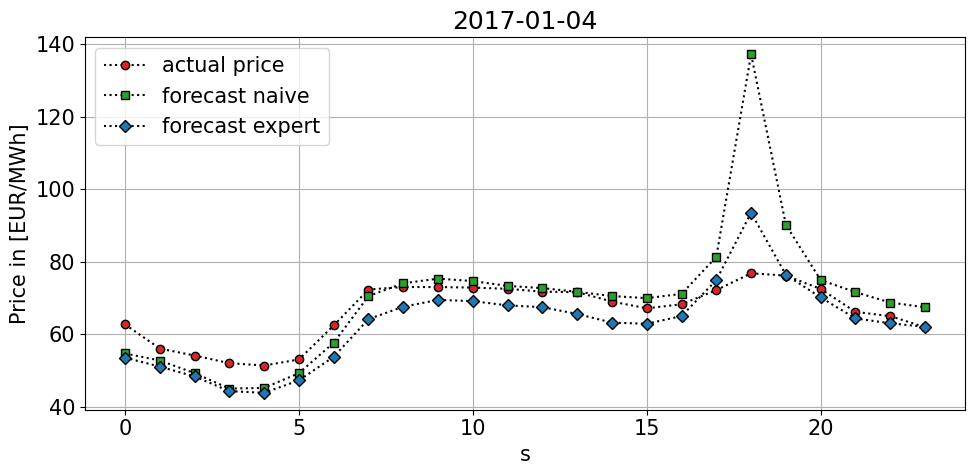

In [35]:
# %% plot the forecasts and the actual prices
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10, 5))
markers = ['o', 's', 'D']
colors = ['tab:red', 'tab:green', 'tab:blue']
for i in range(df.shape[1]):
    plt.plot(df.iloc[:, i], linestyle='dotted', marker=markers[i],
             color='black', markerfacecolor=colors[i])
plt.ylabel("Price in [EUR/MWh]")
plt.xlabel("s")
plt.title(dates_S[index[-1]+1])
plt.tight_layout()
plt.grid()
plt.legend(['actual price', 'forecast naive', 'forecast expert'])
#plt.savefig("out/illustration_forecast.pdf")
plt.show()

In [36]:
# %% the forecasting error
price_S.iloc[index[-1] + 1] - f_naive["forecasts"]
# %%
price_S.iloc[index[-1] + 1] - f_expert["forecasts"]


0      9.157945
1      4.988127
2      5.751752
3      7.722533
4      7.527559
5      5.761821
6      8.626823
7      8.170365
8      5.428482
9      3.538070
10     3.738121
11     4.568717
12     4.270746
13     6.015777
14     5.809080
15     4.259208
16     3.265501
17    -2.760906
18   -16.693027
19    -0.229683
20     2.352892
21     1.809161
22     1.975701
23    -0.067035
Name: 2017-01-04, dtype: float64

In [37]:
# %% the coefficients
index = np.arange(price_S.shape[0])  # full data set
Y = price_S.iloc[index]
days = pd.to_datetime(dates_S[index], utc=True)

# for week-day dummies:
weekdays_num = days.dt.weekday+1

# expert specification
expert_wd = [1, 6, 7]  # 1=Mon, 2=Tue, ..., 7=Sun
expert_lags = [1, 2, 7]  # lags

WD = pd.DataFrame([(weekdays_num == x) + 0 for x in expert_wd]).transpose()
WD.columns = [day_abbr[i-1] for i in expert_wd]

In [38]:

def get_lagged(lag, Z):
    return np.concatenate((np.repeat(np.nan, lag), Z[:(len(Z) - lag)]))

In [39]:
# preparation of lags :
regressors = [[]]*4
COEFLIST = [np.empty((S, len(expert_wd) + len(expert_lags)+1)),
            np.empty((S, len(expert_wd) + len(expert_lags))),
            np.empty((S, len(expert_wd) + 1)),
            np.empty((S, len(expert_wd)))]





In [40]:
act_index = ~ np.isnan(YREG)

In [41]:

for s in range(S):
    # prepare the Y vector
    YREG = Y.iloc[:, s].values

    # get lags
    XLAG = pd.DataFrame(np.transpose([get_lagged(lag=lag, Z=YREG)
                                      for lag in expert_lags]),
                        columns=["lag "+str(lag) for lag in expert_lags])

    # combine to X matrix
    XREG = pd.concat((pd.Series(np.ones(XLAG.shape[0]), name="intercept"),
                      XLAG, WD), axis=1)

    # no NAs
    act_index = ~np.isnan(YREG)

    # Check for NaN values in XREG
    nan_mask = XREG.isna().any(axis=1)
    act_index &= ~nan_mask

    # estimate expert model
    COEFLIST[0][s] = LinearRegression(fit_intercept=False).fit(
        X=XREG[act_index], y=YREG[act_index]).coef_
    regressors[0] = list(XREG.columns)

    # estimate scaled expert model
    XREG = XREG.iloc[:, 1:]
    COEFLIST[1][s] = LinearRegression(fit_intercept=False).fit(
        X=((XREG - XREG.mean(0))/XREG.std())[act_index],
        y=YREG[act_index]).coef_
    regressors[1] = list(XREG.columns)

    # the same for the simple model
    XREG = pd.concat(
        (pd.Series(np.ones(XLAG.shape[0]), name="intercept"), WD), axis=1)
    COEFLIST[2][s] = LinearRegression(fit_intercept=False).fit(
        X=XREG[act_index], y=YREG[act_index]).coef_
    regressors[2] = list(XREG.columns)

    XREG = XREG.iloc[:, 1:]
    COEFLIST[3][s] = LinearRegression(fit_intercept=False).fit(
        X=((XREG - XREG.mean(0))/XREG.std())[act_index],
        y=YREG[act_index]).coef_
    regressors[3] = list(XREG.columns)


In [42]:
print("Dimensions of act_index:", act_index.shape)
#print("Dimensions of XREG:", XREG.shape)
#print("Dimensions of YREG:", YREG.shape)


Dimensions of act_index: (3218,)


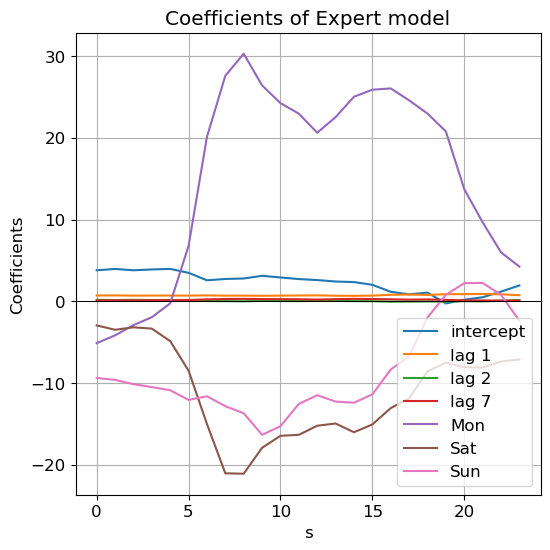

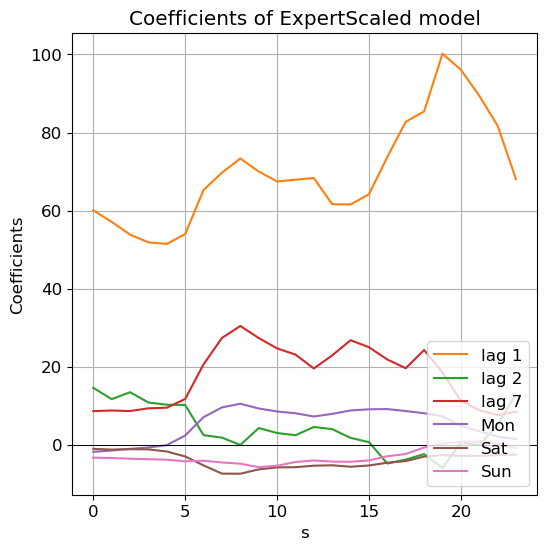

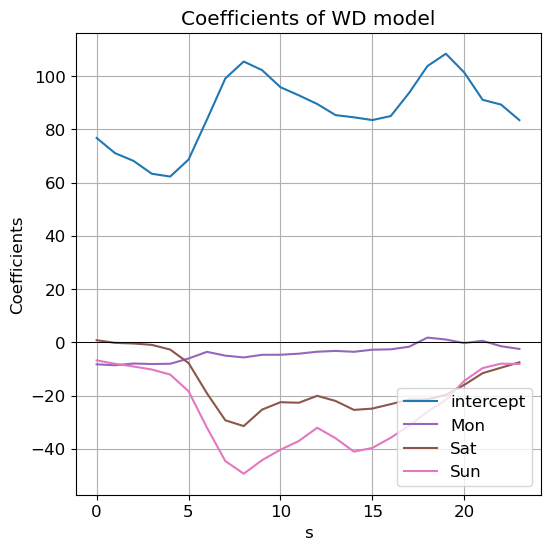

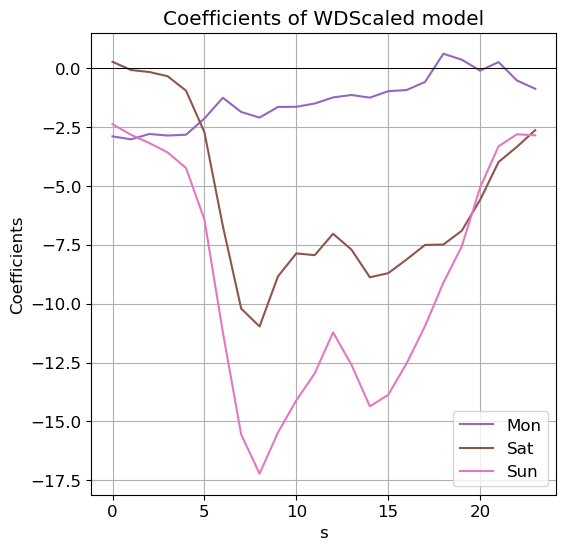

In [43]:
# %%
COLORNAMES = regressors[0]
COLORS = np.array(["C"+str(i) for i in range(len(regressors[0]))])
names = ["Expert", "ExpertScaled", "WD", "WDScaled"]

plt.rcParams.update({'font.size': 12})
for i in range(len(COEFLIST)):
    MAT = COEFLIST[i]
    actcol = [COLORNAMES.index(x) for x in regressors[i] if x in regressors[i]]
    plt.figure(figsize=(6, 6))
    for j in range(MAT.shape[1]):
        plt.plot(MAT[:, j], color=COLORS[actcol][j])
    plt.legend(regressors[i], loc='lower right')
    plt.grid()
    plt.ylabel("Coefficients")
    plt.xlabel("s")
    plt.title("Coefficients of "+names[i]+" model")
    plt.axhline(y=0, color='black', linewidth=0.7)
    #plt.savefig("out/coefs_"+names[i]+".pdf")
    plt.show()

In [44]:
# # Define the train test set (2 years)
# N = 2*365*24
# data_train = data[:-N]

# data_test= data[N:]

# Correlation structure

# External Regressors

In [58]:
# %%
# day-ahead price
price = data_array[:, :, data.columns[1:] == "FR_Price_DayAhead_PT60M_EUR"][..., 0]
# day-ahead load
load = data_array[:, :, data.columns[1:] == "FR_Load_DayAhead_PT60M"][..., 0]
# day-ahead wind onshore
windon = data_array[:, :, data.columns[1:] == "FR_Generation_Wind_Onshore_DayAhead_PT60M"][..., 0]
# day-ahead nuclear power
nuclear = data_array[:, :, data.columns[1:] == "FR_Generation_Nuclear_Actual_Output_PT60M"][..., 0]
# day-ahead solar
solar = data_array[:, :, data.columns[1:] == "FR_Generation_Solar_DayAhead_PT60M"][..., 0]
# day-ahead residual load
residualload = load - windon - solar

control enter

In [59]:

# # day-ahead price
# price = data_array[:, :, data.columns[1:] == "FR_Price_DayAhead_PT60M_EUR"][..., 0]

# # day-ahead load
# load = data_array[:, :, data.columns[1:] == "FR_Load_DayAhead_PT60M"][..., 0]

# # actual load
# #loadact = data_array[:, :, data.columns[1:] == "FR_Load_Actual_PT60M"][..., 0]

# # day-ahead wind onshore
# windon = data_array[:, :, data.columns[1:] == "FR_Generation_Wind_Onshore_DayAhead_PT60M"][..., 0]
# # day-ahead solar
# solar = data_array[:, :, data.columns[1:] == "FR_Generation_Solar_DayAhead_PT60M"][..., 0]
# # day-ahead residual load
# residualload = load - windon - solar

# day-ahead nuclear power
#nuclear = data_array[:, :, data.columns[1:] == "FR_Generation_Nuclear_Actual_Output_PT60M"][..., 0]


##Phisical flow

flow_frch = data_array[:, :, data.columns[1:] == "FR_CH_PhysicalFlow_Actual_PT60M"][..., 0]
flow_fres = data_array[:, :, data.columns[1:] == "FR_ES_PhysicalFlow_Actual_PT60M"][..., 0]
flow_frit = data_array[:, :, data.columns[1:] == "FR_IT-North_PhysicalFlow_Actual_PT60M"][..., 0]
flow_frbe = data_array[:, :, data.columns[1:] == "FR_BE_PhysicalFlow_Actual_PT60M"][..., 0]
flow_frgb = data_array[:, :, data.columns[1:] == "FR_GB_PhysicalFlow_Actual_PT60M"][..., 0]
flow_frde = data_array[:, :, data.columns[1:] == "FR_DE-AT-LU_PhysicalFlow_Actual_PT60M"][..., 0] 




## Price Dayahead
price_frch = data_array[:, :, data.columns[1:] == "CH_Price_DayAhead_PT60M_EUR"][..., 0]
price_fres = data_array[:, :, data.columns[1:] == "ES_Price_DayAhead_PT60M_EUR"][..., 0]
price_frit = data_array[:, :, data.columns[1:] == "IT-North_Price_DayAhead_PT60M_EUR"][..., 0]
price_frbe = data_array[:, :, data.columns[1:] == "BE_Price_DayAhead_PT60M_EUR"][..., 0]
price_frgb = data_array[:, :, data.columns[1:] == "GB_Price_DayAhead_PT60M_GBP"][..., 0]
price_frde = data_array[:, :, data.columns[1:] == "DE-AT-LU_Price_DayAhead_PT60M_EUR"][..., 0]


## Load Dayahead
load_frch = data_array[:, :, data.columns[1:] == "CH_Load_DayAhead_PT60M"][..., 0]
load_fres = data_array[:, :, data.columns[1:] == "ES_Load_DayAhead_PT60M"][..., 0]
load_frit = data_array[:, :, data.columns[1:] == "IT-North_Load_DayAhead_PT60M"][..., 0]
load_frbe = data_array[:, :, data.columns[1:] == "BE_Load_DayAhead_PT15M"][..., 0]
load_frgb = data_array[:, :, data.columns[1:] == "GB_Load_DayAhead_PT30M"][..., 0]
load_frde = data_array[:, :, data.columns[1:] == "DE-AT-LU_Load_DayAhead_PT15M"][..., 0]




In [60]:

df_trial = pd.DataFrame({
    "Price": price.flatten(),
    "Load": load.flatten(),
    #"Loadact": loadact.flatten(),
    #"Wind Onshore": windon.flatten(),
    "Nuclearpower": nuclear.flatten(),
    #"Solar": solar.flatten(),
    "ResidualLoad": residualload.flatten(),
    "flow_frch": flow_frch.flatten(),
    "flow_fres": flow_fres.flatten(),
    "flow_frit": flow_frit.flatten(),
    "flow_frbe": flow_frbe.flatten(),
    "flow_frgb": flow_frgb.flatten(),
    "flow_frde": flow_frde.flatten(),
    "price_frch": price_frch.flatten(),
    "price_fres": price_fres.flatten(),
    "price_frit": price_frit.flatten(),
    "price_frbe": price_frbe.flatten(),
    "price_frgb": price_frgb.flatten(),
    "price_frde": price_frde.flatten(),
    "load_frch": load_frch.flatten(),
    "load_fres": load_fres.flatten(),
    "load_frit": load_frit.flatten(),
    "load_frbe": load_frbe.flatten(),
    "load_frgb": load_frgb.flatten(),
    "load_frde": load_frde.flatten()
})

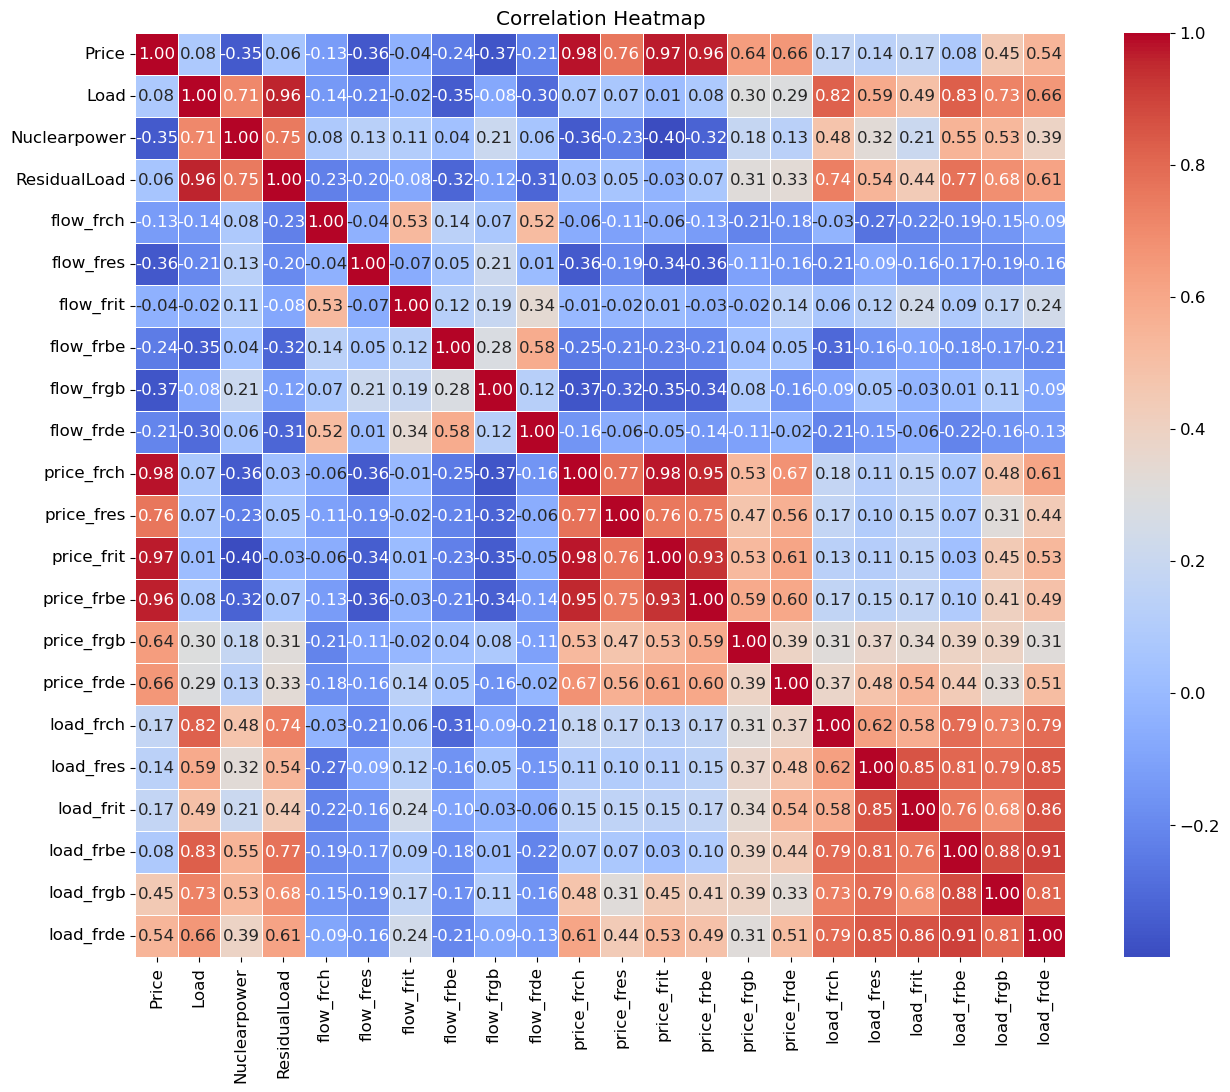

In [61]:
# Calculate the correlation matrix
correlation_matrix = df_trial.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

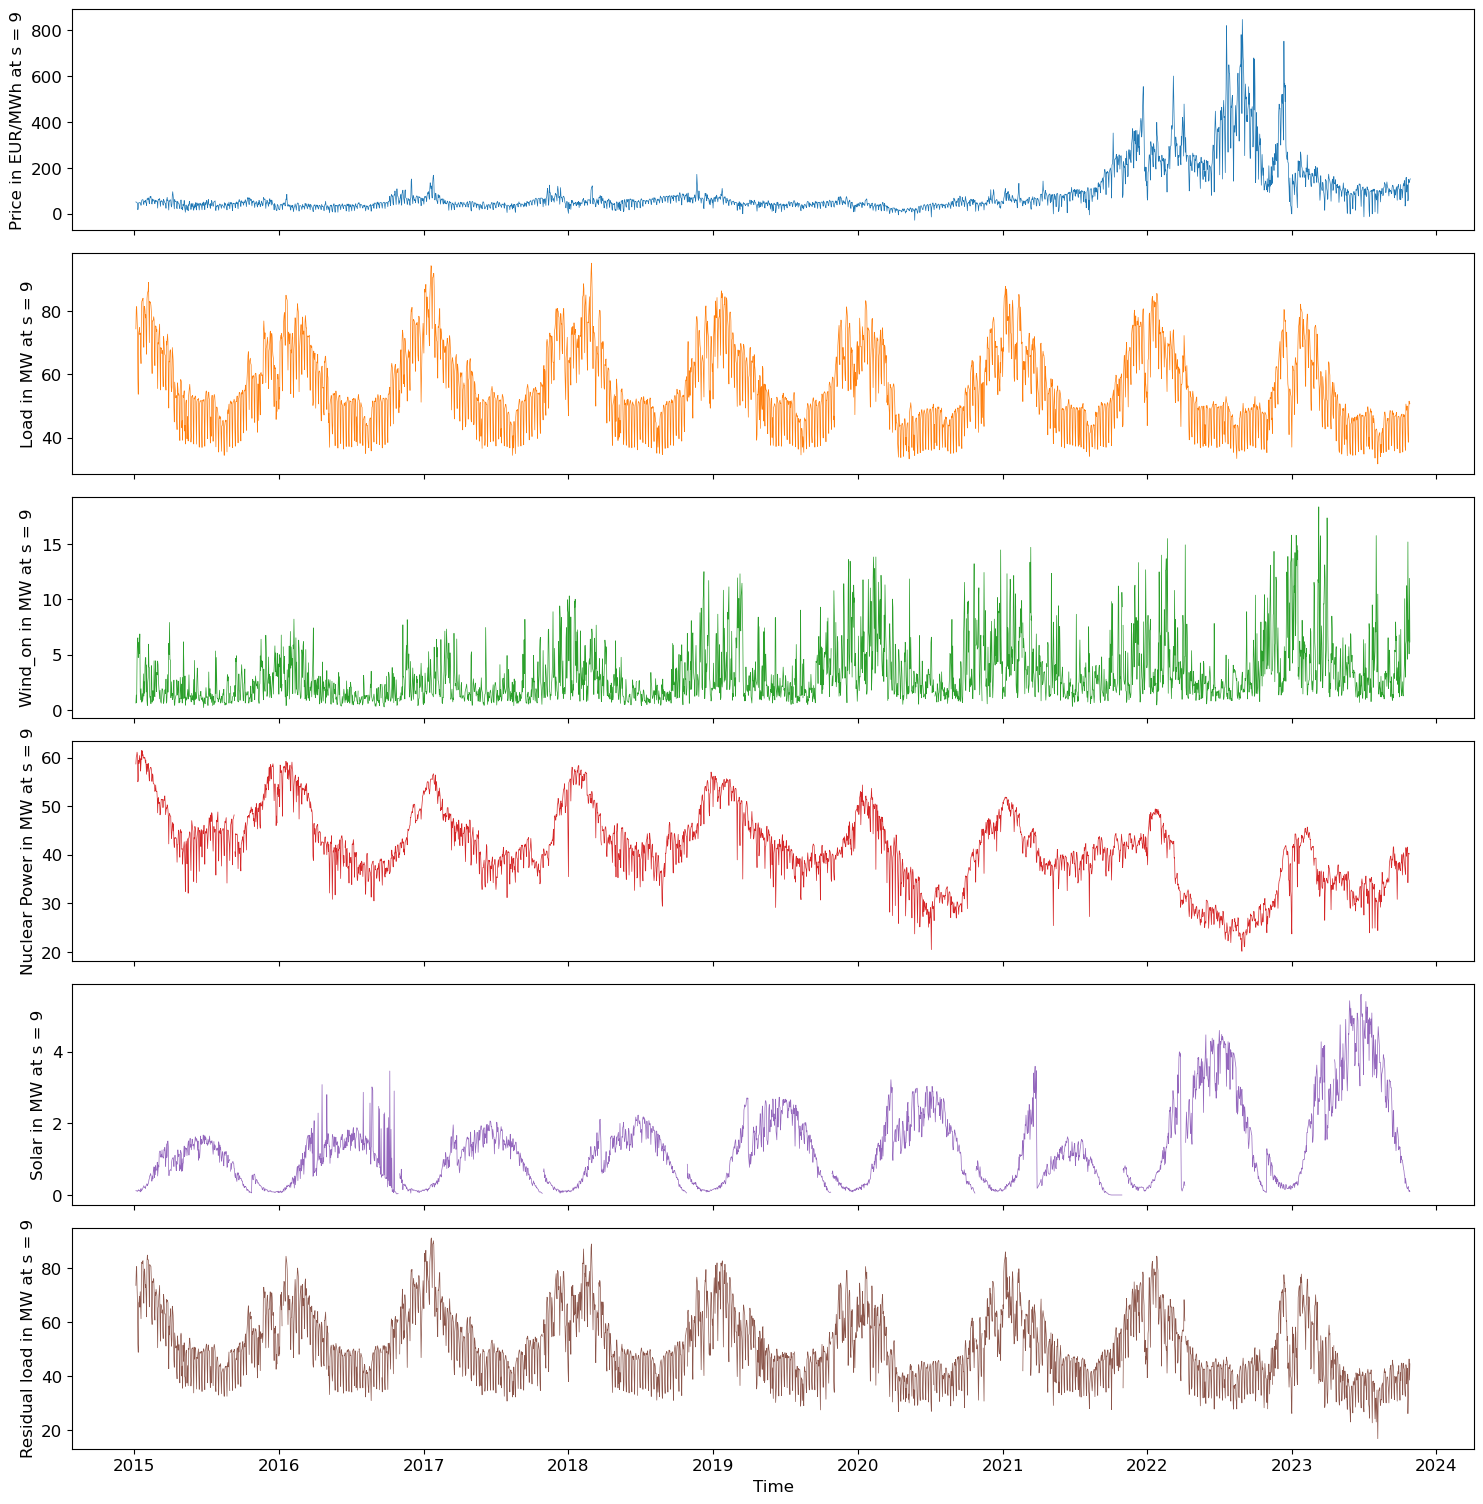

In [50]:
# %% plot all above time series
s = 9
fig, axs = plt.subplots(6, figsize=(15, 15), sharex=True)

axs[0].plot(dates_S, price[:, s], linewidth=0.5, color="C0")
axs[0].set_ylabel("Price in EUR/MWh at s = "+str(s))

axs[1].plot(dates_S, load[:, s], linewidth=0.5, color="C1")
axs[1].set_ylabel("Load in MW at s = "+str(s))

axs[2].plot(dates_S, windon[:, s], linewidth=0.5, color="C2")
axs[2].set_ylabel("Wind_on in MW at s = "+str(s))

axs[3].plot(dates_S, nuclear[:, s], linewidth=0.5, color="C3")
axs[3].set_ylabel("Nuclear Power in MW at s = "+str(s))

axs[4].plot(dates_S, solar[:, s], linewidth=0.5, color="C4")
axs[4].set_ylabel("Solar in MW at s = "+str(s))

axs[5].plot(dates_S, residualload[:, s], linewidth=0.5, color="C5")
axs[5].set_ylabel("Residual load in MW at s = "+str(s))

plt.tight_layout()
plt.xlabel("Time")
plt.show()

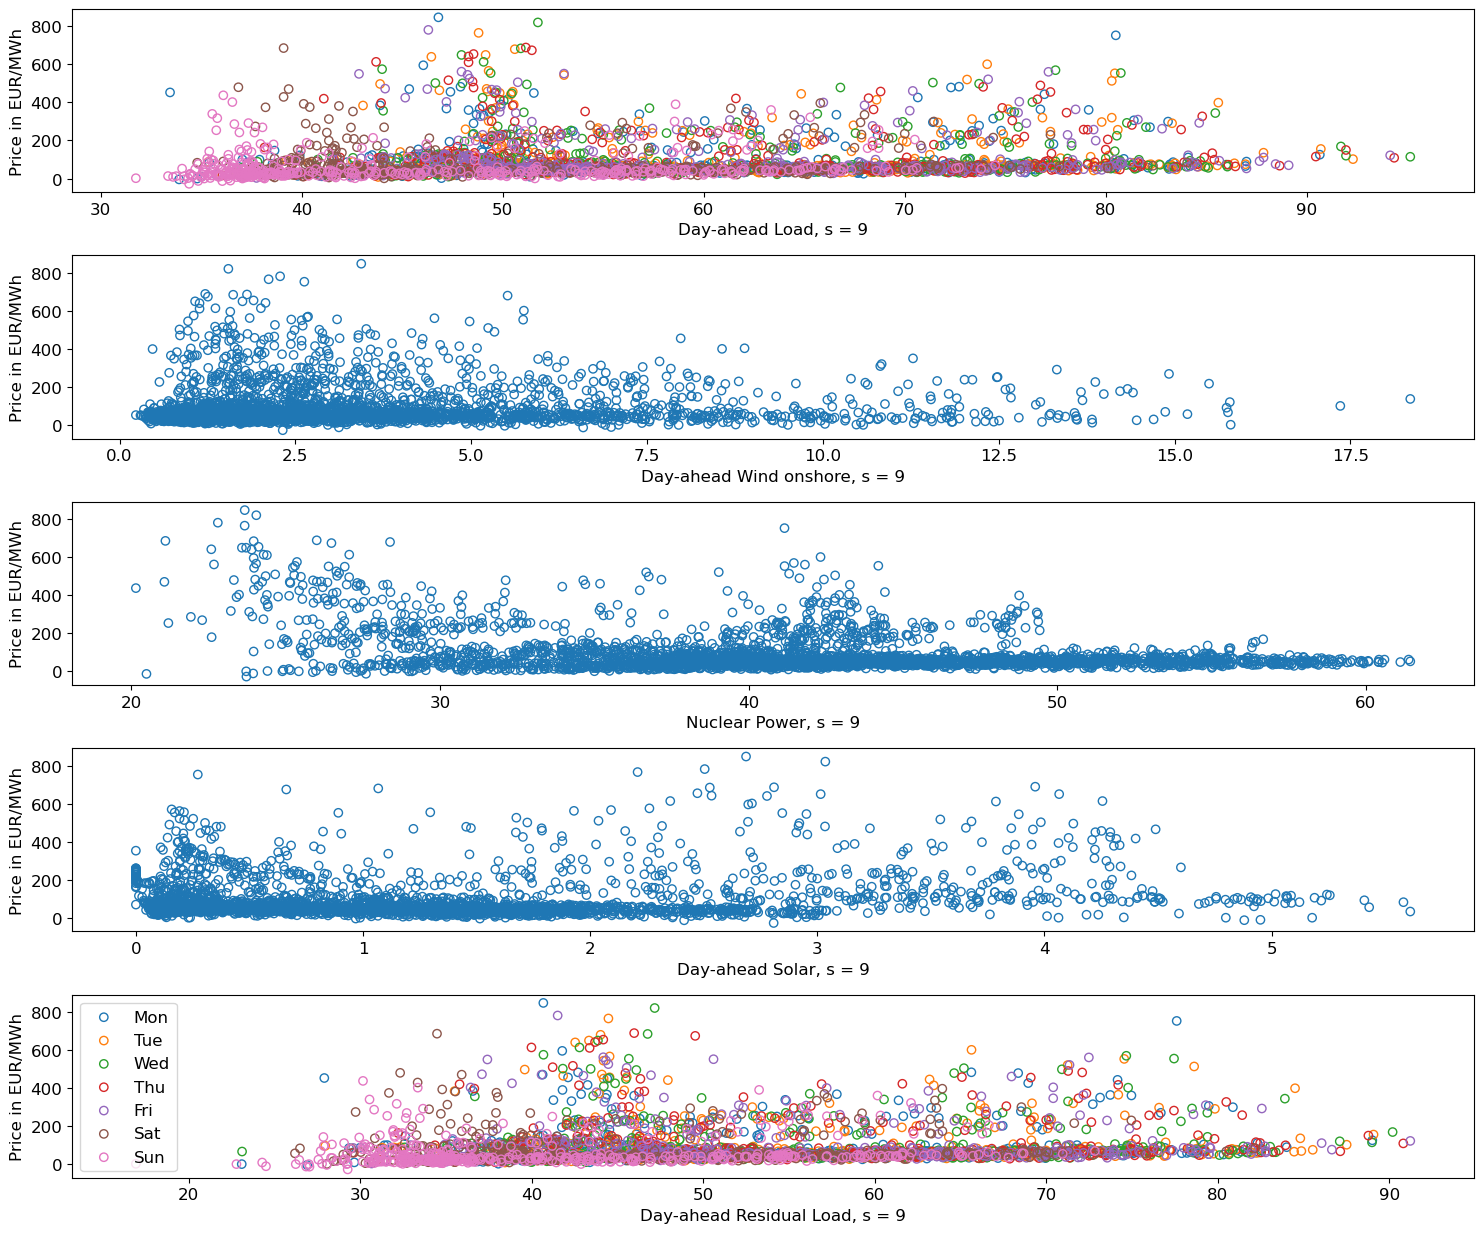

In [51]:
# %% price vs fundamentals plots
s = 9
fig, axs = plt.subplots(5, figsize=(15, 12.5))

colors = ["C"+str(i) for i in range(7)]
weekdays = pd.to_datetime(dates_S).dt.weekday.values

# day-ahead load
for day in np.unique(weekdays):
    axs[0].scatter(load[weekdays == day, s], price[weekdays == day, s],
                   color=colors[day], facecolors='none')
axs[0].set_ylabel("Price in EUR/MWh")
axs[0].set_xlabel("Day-ahead Load, s = "+str(s))

# day-ahead wind onshore
axs[1].scatter(windon[:, s], price[:, s], color='C0', facecolors='none')
axs[1].set_ylabel("Price in EUR/MWh")
axs[1].set_xlabel("Day-ahead Wind onshore, s = "+str(s))

# nuclear power
axs[2].scatter(nuclear[:, s], price[:, s], color='C0', facecolors='none')
axs[2].set_ylabel("Price in EUR/MWh")
axs[2].set_xlabel("Nuclear Power, s = "+str(s))

# day-ahead solar
axs[3].scatter(solar[:, s], price[:, s], color='C0', facecolors='none')
axs[3].set_ylabel("Price in EUR/MWh")
axs[3].set_xlabel("Day-ahead Solar, s = "+str(s))

# day-ahead residual load
for day in np.unique(weekdays):
    axs[4].scatter(residualload[weekdays == day, s], price[weekdays == day, s],
                   color=colors[day], facecolors='none')
axs[4].set_ylabel("Price in EUR/MWh")
axs[4].set_xlabel("Day-ahead Residual Load, s = "+str(s))

plt.legend([day_abbr[i] for i in range(7)])
plt.tight_layout()
plt.show()


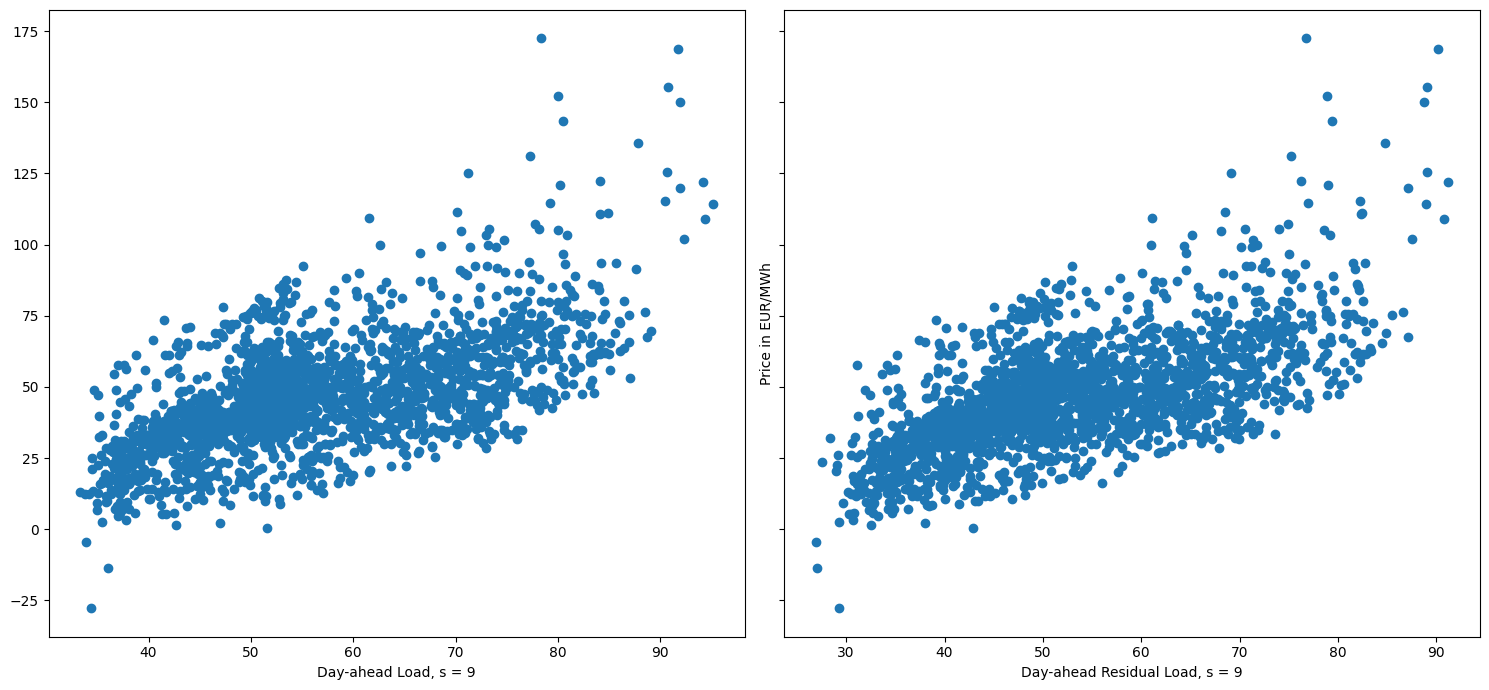

array([[nan, nan],
       [nan,  1.]])

In [ ]:
# %% now lets compare price vs load and residual load

s = 9
fig, axs = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

axs[0].scatter(load[:, s], price[:, s])
axs[0].set_xlabel("Day-ahead Load, s = "+str(s))

axs[1].scatter(residualload[:, s], price[:, s])
axs[1].set_xlabel("Day-ahead Residual Load, s = "+str(s))

plt.ylabel("Price in EUR/MWh")
plt.tight_layout()
plt.show()

# %% compare correlation
np.corrcoef(load[:, s], price[:, s])
# %%
np.corrcoef(residualload[:, s], price[:, s])

## Lasso and Ridge